In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Input dataset for XOR function
x = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0,1,1,0]])

In [8]:
# Number of inputs
n_x = 2
# Number of neurns in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
print(w1)
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
print(w2)
# I didnt use bias units
# We will use this list to accumulate losses
losses = []

[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
[[0.4203678  0.33033482]]


In [9]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    return z * (1 - z)

In [10]:
# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2


In [11]:
# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

In [12]:
iterations = 200000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1



Text(0, 0.5, 'Loss value')

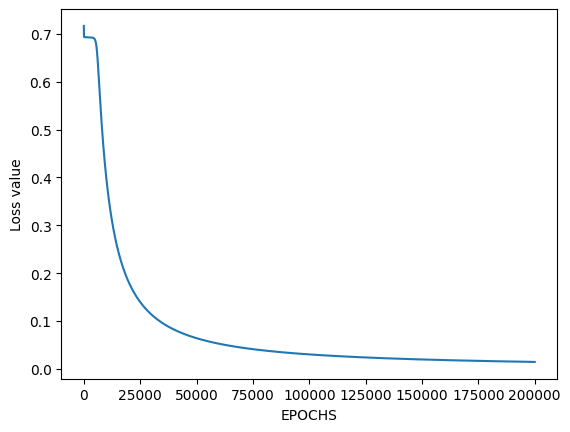

In [13]:
# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [14]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [15]:
test = np.array([[0],[1]])
predict(w1,w2,test)

For input [0, 1] output is 1
